# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2381 Ивашинников Леонид Дмитриевич и Двиков Даниил Владиславович. Вариант №7.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:
$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$$
Формула трапеций:
$$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$$
Формула Симпсона:
$$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$$
Формула для интегрирования по «правилу 3/8»:
$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$
Связь передаточной функции для круговой частоты и циклической:
$$H(w) = H(2 \pi f) = \tilde H(f)$$

## Постановка задачи

Получить формулы для передаточных функций рекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

## Задание 1
Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.


### Передаточная функция рекурсивного фильтра, соответствующего квадратурной формуле прямоугольников

Формула прямоугольников:

$$
y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0
$$

Пусть входной сигнал гармонический:

$$
s_n = e^{i \omega n}, \quad y_n = H(\omega)e^{i \omega n},
$$

где $ H(\omega)$ — частотная передаточная функция фильтра.

Тогда, подставляя в основное уравнение:

$$
\begin{cases}
y_{n+1} = H(\omega)e^{i\omega n} + e^{i\omega (n+1/2)},\\[4pt]
y_{n+1} = H(\omega)e^{i\omega (n+1)}.
\end{cases}
$$

### Вывод передаточной функции

Подставим второе выражение во второе уравнение и приравняем:

$$
H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega n} + e^{i\omega (n+1/2)}
$$


Вынесем общий множитель $ e^{i\omega n}$:

$$
H(\omega)e^{i\omega n}(e^{i\omega} - 1) = e^{i\omega n}e^{i 1/2\omega}
$$

Сократим и получим
$$
H(\omega)(e^{i\omega} - 1) = e^{i 1/2\omega}
$$

$$
H(\omega) = \dfrac{e^{i 1/2\omega}}{e^{i\omega} - 1}
$$

Домножим числитель и знаменатель на $e^{-i1/2\omega}$:

$$
H(\omega) = \frac{1}{e^{i1/2\omega} - e^{-i1/2\omega}} = \frac{1}{2i \sin\frac{\omega}{2}}
$$

### Сравнение с точным интегралом

Для непрерывного интеграла от $e^{i\omega t}$:

$$
\int e^{i\omega t} dt = \frac{e^{i\omega t}}{i\omega}.
$$

Следовательно, отношение вычисленного значения к точному:

$$
\gamma = \frac{\text{Calculated}}{\text{Accurate}} = 
\frac{\dfrac{1}{2i\sin(\omega/2)}}{\dfrac{1}{i\omega}} 
= \frac{\omega/2}{\sin(\omega/2)}.
$$

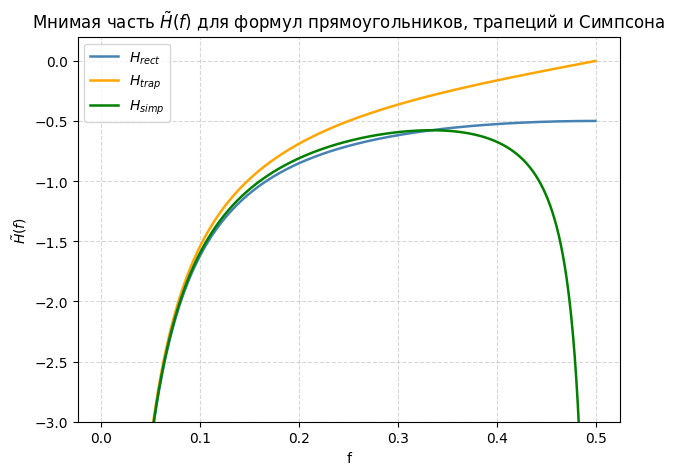

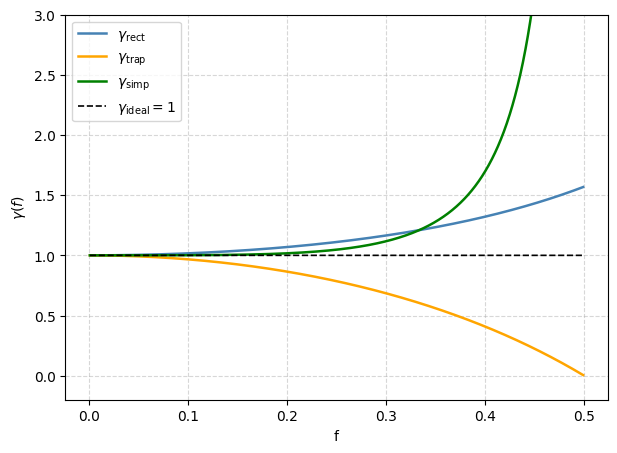

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
freq = np.linspace(1e-3, 1/2 - 1e-3, 1500)
omega = 2 * np.pi * freq

H_rect = (1 / (2j * np.sin(omega / 2)))
H_trap = (np.cos(omega / 2) / (2j * np.sin(omega / 2)))
H_simp = ((2 + np.cos(omega)) / (3j * np.sin(omega)))

gamma_rect = (1/2 * omega) / np.sin(1/2 * omega)
gamma_trap = (1/2 * omega * np.cos(1/2 * omega)) / np.sin(1/2 * omega)
gamma_simp = (omega * (np.cos(omega) + 2)) / (3 * np.sin(omega))

# идеальное значение (γ = 1)
gamma_ideal = np.ones_like(freq)


plt.figure(figsize=(7, 5))
plt.title(r'Мнимая часть $\tilde{H}(f)$ для формул прямоугольников, трапеций и Симпсона')

plt.plot(freq, np.imag(H_rect), color='steelblue', lw=1.8, label=r'$H_{rect}$')
plt.plot(freq, np.imag(H_trap), color='orange', lw=1.8, label=r'$H_{trap}$')
plt.plot(freq, np.imag(H_simp), color='green', lw=1.8, label=r'$H_{simp}$')

plt.xlabel('f')
plt.ylabel(r'$\tilde{H}(f)$')
plt.ylim(-3, 0.2)
plt.grid(alpha=1/2, linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(freq, gamma_rect, lw=1.8, label=r'$\gamma_{\mathrm{rect}}$', color='steelblue')
plt.plot(freq, gamma_trap, lw=1.8, label=r'$\gamma_{\mathrm{trap}}$', color='orange')
plt.plot(freq, gamma_simp, lw=1.8, label=r'$\gamma_{\mathrm{simp}}$', color='green')
plt.plot(freq, gamma_ideal, 'k--', lw=1.2, label=r'$\gamma_{\mathrm{ideal}} = 1$')

plt.xlabel('f')
plt.ylabel(r'$\gamma(f)$')
plt.ylim(-0.2, 3)
plt.grid(alpha=1/2, linestyle='--')
plt.legend()
plt.show()


1. На низких частотах (НЧ) все методы дают практически одинаковые результаты.  
   Значения передаточных функций и коэффициента $\gamma(f)$ близки к идеальным,  
   что подтверждает высокую точность интегрирования медленно изменяющихся сигналов.

2. На средних частотах (СЧ) между методами наблюдаются отличия:  
   - метод прямоугольников  завышает результат интегрирования;  
   - метод трапеций — занижает его, но остаётся устойчивым;  
   - метод Симпсона демонстрирует наилучшее совпадение с идеальным интегратором.  
   Это отражено как на графиках мнимой части передаточных функций, так и на графиках $\gamma(f)$.

3. На высоких частотах (ВЧ) различия становятся наиболее выраженными:  
   - метод Симпсона имеет резкое изменение характеристики и становится чувствительным к шуму;  
   - метод трапеций обеспечивает наиболее плавное затухание и устойчивость;  
   - метод прямоугольников практически не ослабляет ВЧ-составляющие,  
     что делает его менее надёжным при фильтрации сигналов с высокочастотными колебаниями


## Задание 2
Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»

$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.


### Передаточная функция рекурсивного фильтра для интегрирования «по правилу 3/8»

Формула численного интегрирования по правилу 3/8 имеет вид:

$$
y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1})
$$

Пусть входной сигнал гармонический:

$$
s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n},
$$

Тогда:

$$
\begin{cases}
y_{n+2} = H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)}), \\[6pt]
y_{n+2} = H(\omega)e^{i\omega (n+2)}.
\end{cases}
$$

### Вывод передаточной функции

Подставим во второе уравнение и приравняем:

$$
H(\omega)e^{i\omega (n+2)} = H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)}).
$$

Вынесем общий множитель $ e^{i\omega (n-1)}: $

$$
H(\omega)(e^{i2\omega} - e^{-i\omega}) = \frac{1}{8}(e^{i2\omega} + 3e^{i\omega} + 3 + e^{-i\omega}).
$$

Разделим обе части на знаменатель и выразим $ H(\omega)$:

$$
H(\omega) = \frac{e^{i2\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{i2\omega} - e^{-i\omega})}.
$$

Домножим числитель и знаменатель на $e^{-i\omega}$

$$
H(\omega) = \frac{e^{i\omega} + 3 + 3e^{-i\omega} + e^{-i2\omega}}{8(e^{i\omega} - e^{-i2\omega})}.
$$

После приведения к тригонометрическому виду получаем:

$$
H(\omega) = \frac{2\cos\!\left(\frac{3\omega}{2}\right) + 6\cos\!\left(\frac{\omega}{2}\right)}{16i\sin\!\left(\frac{3\omega}{2}\right)} =  \frac{\cos\!\left(\tfrac{3\omega}{2}\right) + 3\cos\!\left(\tfrac{\omega}{2}\right)}
{8i\sin\!\left(\tfrac{3\omega}{2}\right)}.
$$

### Сравнение с точным интегралом

Для непрерывного интеграла от $e^{i\omega t}$:

$$
\int e^{i\omega t} dt = \frac{e^{i\omega t}}{i\omega}.
$$

Следовательно, отношение вычисленного значения к точному:

$$
\gamma = \frac{\text{Calculated}}{\text{Accurate}}
= \frac{\left(\cos\!\frac{3\omega}{2} + 3\cos\!\frac{\omega}{2}\right)i\omega}
{8i\sin\!\frac{3\omega}{2}}
= \frac{1}{8}\,\frac{\left(\cos\!\frac{3\omega}{2} + 3\cos\!\frac{\omega}{2}\right)\omega}
{\sin\!\frac{3\omega}{2}}.
$$


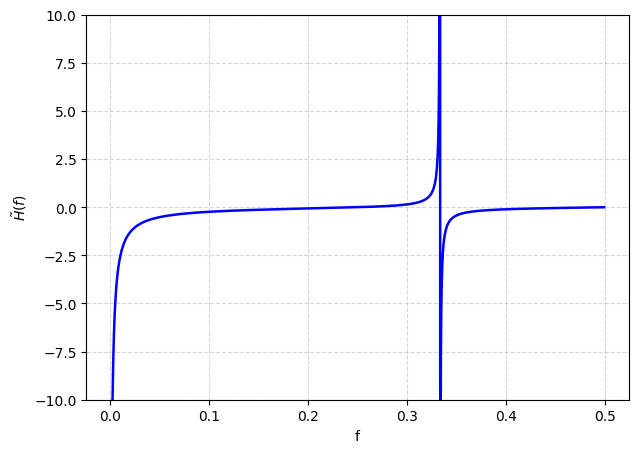

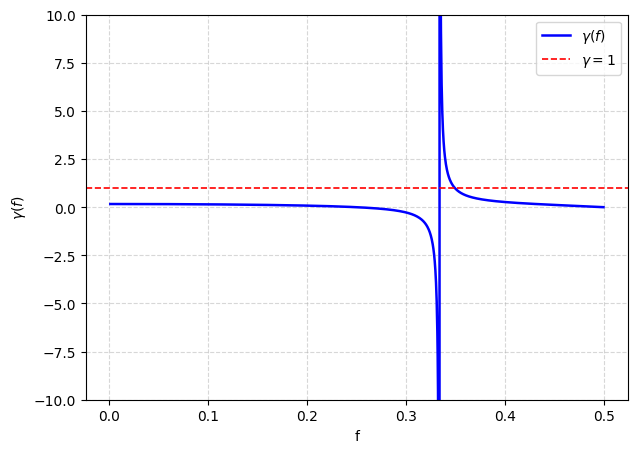

In [39]:
H_three_eighth = (np.cos(1.5 * omega) + np.cos(0.5 * omega)) / (8j * np.sin(1.5 * omega))
gamma_three_eighth = ((np.cos(1.5 * omega) + np.cos(0.5 * omega)) * omega) / (8 * np.sin(1.5 * omega))

plt.figure(figsize=(7, 5))
plt.plot(freq, np.imag(H_three_eighth), color='blue', lw=1.8)
plt.xlabel('f')
plt.ylabel(r'$\tilde{H}(f)$')
plt.ylim(-10, 10)
plt.grid(alpha=0.5, linestyle='--')
plt.show()


plt.figure(figsize=(7, 5))
plt.plot(freq, gamma_three_eighth, color='blue', lw=1.8, label=r'$\gamma(f)$')
plt.axhline(y=1, color='red', lw=1.2, linestyle='--', label=r'$\gamma=1$')

plt.xlabel('f')
plt.ylabel(r'$\gamma(f)$')
plt.ylim(-10, 10)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()


Передаточная функция фильтра, построенного по правилу 3/8, обладает интегрирующими свойствами в низкочастотной области, однако с заметным отклонением от идеального интегратора.  
На низких частотах амплитуда занижена $\gamma < 1$, вблизи $f \approx 1/3$ наблюдается резкий рост, а на более высоких частотах характеристика быстро затухает.  
Таким образом, фильтр точно аппроксимирует интегрирование только в узком диапазоне низких частот и неустойчив при воздействии высокочастотных составляющих сигнала.


## Задание 3
Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

1. В области низких частот (НЧ) амплитуды передаточных функций всех методов близки к идеальным значениям.  
Все рассмотренные формулы — прямоугольников, трапеций, Симпсона и 3/8 - корректно передают изменение сигнала и обеспечивают точное интегрирование медленных колебаний.

2. В области средних частот (СЧ) появляются различия:  
   - метод прямоугольников слегка завышает амплитуду;  
   - метод трапеций даёт более стабильное, но немного заниженное значение;  
   - метод Симпсона сохраняет хорошее соответствие идеальному интегратору;  
   - метод 3/8 проявляет локальные участки усиления сигнала и искажения фазы.

3. На высоких частотах (ВЧ) различия усиливаются:  
   - у метода 3/8 наблюдается полюс при $f \approx 1/3$\$, где сигнал сильно искажается;  
   - метод Симпсона также теряет устойчивость при $f \to 0.5$;  
   - метод трапеций обеспечивает наиболее плавное уменьшение амплитуды и стабильную работу;  
   - метод прямоугольников слабо подавляет высокочастотные составляющие, что делает его наименее точным при шумных сигналах.

## Выводы

В ходе лабораторной работы были получены и исследованы передаточные функции рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона и правилу 3/8.  
Были построены графики передаточных функций и отношения вычисляемого значения к точному, а также проведён их частотный анализ.

Результаты показали, что все рассмотренные методы обеспечивают высокую точность интегрирования на низких частотах.  
При увеличении частоты наблюдаются различия в форме амплитудных характеристик:  
метод прямоугольников завышает результат, метод трапеций даёт наиболее устойчивое поведение, метод Симпсона сохраняет хорошее приближение к идеальному интегратору, а правило 3/8 проявляет резкие искажения и полюс в области средних частот.

Таким образом, метод трапеций можно считать оптимальным по соотношению точности и устойчивости,  
а метод 3/8 — наименее устойчивым при воздействии высокочастотных составляющих сигнала.